In [104]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [105]:
accounts = pd.read_csv("https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/DS%20II%20-%20Final%20Dataset.csv")
accounts

,Acc #,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age,City,Area,avg days before game ticket is purchased,Ticket Purchase Source,Distance from Stadium,Discount Usage,Days Since Last Game Attended,Most Common Game Day,Subscribed to Email List
0,59706132,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,25,Scarborough,Greater Toronto Area,2,App,31,0,158,Saturday,0
1,94828583,1,2,540.0,Defensive Ends,Downtown Toronto (Richmond/Adelaide/King),M,57,Toronto,Downtown Toronto,3,Website,11,0,157,Saturday,1
2,31566094,1,2,540.0,Defensive Ends,Scarborough (Guildwood),F,48,Scarborough,Greater Toronto Area,1,App,30,0,159,Tuesday,0
3,66750139,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,52,Scarborough,Greater Toronto Area,2,Website,23,0,124,Saturday,0
4,74126192,4,8,2184.0,Attacking Corner,Etobicoke (South Steeles),F,31,Etobicoke,Greater Toronto Area,15,App,30,0,40,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149171,14789075,4,8,1520.0,UB - Defensive End,Downtown Toronto (St. James Town),F,56,Toronto,Downtown Toronto,6,App,34,0,88,Tuesday,0
149172,37596814,2,4,760.0,UB - Defensive End,Hamilton (Waterdown),M,36,Toronto,Greater Toronto Area,2,App,32,1,159,Wednesday,0
149173,15749982,5,10,1450.0,Standing Room Only,Scarborough (Golden Mile),M,59,Scarborough,Greater Toronto Area,2,Website,5,0,128,Friday,0
149174,61411679,1,2,430.0,UB - Attacking Corner,Hamilton (Southam / Bonnington / Yeoville / Ke...,M,53,Toronto,Downtown Toronto,6,Website,42,0,9,Friday,0


In [106]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149176 entries, 0 to 149175
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Acc #                                     149176 non-null  int64  
 1   Games Attended                            149176 non-null  int64  
 2   Seat Qty                                  149176 non-null  int64  
 3   Net Revenue                               149176 non-null  float64
 4   Most Common Section                       149176 non-null  object 
 5   Region                                    149176 non-null  object 
 6   Gender                                    149176 non-null  object 
 7   Age                                       149176 non-null  int64  
 8   City                                      149176 non-null  object 
 9   Area                                      149176 non-null  object 
 10  avg days before game

In [107]:
print(accounts.columns)

Index(['Acc #', 'Games Attended', 'Seat Qty', 'Net Revenue',
       'Most Common Section', 'Region', 'Gender', 'Age', 'City', 'Area',
       'avg days before game ticket is purchased', 'Ticket Purchase Source',
       'Distance from Stadium', 'Discount Usage',
       'Days Since Last Game Attended', 'Most Common Game Day',
       'Subscribed to Email List'],
      dtype='object')


In [108]:
# Dropped Account ID Variable
accounts.drop('Acc #', axis=1, inplace=True)
accounts

# note: this was dropped as it is the only categorical value in the dataset and this would be non-useful for clustering

,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age,City,Area,avg days before game ticket is purchased,Ticket Purchase Source,Distance from Stadium,Discount Usage,Days Since Last Game Attended,Most Common Game Day,Subscribed to Email List
0,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,25,Scarborough,Greater Toronto Area,2,App,31,0,158,Saturday,0
1,1,2,540.0,Defensive Ends,Downtown Toronto (Richmond/Adelaide/King),M,57,Toronto,Downtown Toronto,3,Website,11,0,157,Saturday,1
2,1,2,540.0,Defensive Ends,Scarborough (Guildwood),F,48,Scarborough,Greater Toronto Area,1,App,30,0,159,Tuesday,0
3,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,52,Scarborough,Greater Toronto Area,2,Website,23,0,124,Saturday,0
4,4,8,2184.0,Attacking Corner,Etobicoke (South Steeles),F,31,Etobicoke,Greater Toronto Area,15,App,30,0,40,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149171,4,8,1520.0,UB - Defensive End,Downtown Toronto (St. James Town),F,56,Toronto,Downtown Toronto,6,App,34,0,88,Tuesday,0
149172,2,4,760.0,UB - Defensive End,Hamilton (Waterdown),M,36,Toronto,Greater Toronto Area,2,App,32,1,159,Wednesday,0
149173,5,10,1450.0,Standing Room Only,Scarborough (Golden Mile),M,59,Scarborough,Greater Toronto Area,2,Website,5,0,128,Friday,0
149174,1,2,430.0,UB - Attacking Corner,Hamilton (Southam / Bonnington / Yeoville / Ke...,M,53,Toronto,Downtown Toronto,6,Website,42,0,9,Friday,0


In [109]:
accounts['Area'].value_counts()

Area
Greater Toronto Area    92168
Downtown Toronto        28792
Outside GTA             28216
Name: count, dtype: int64

In [110]:
def area_categorical(x):
    if x == 'Greater Toronto Area':
        return 1
    elif x == 'Downtown Toronto':
        return 2
    elif x == 'Outside GTA':
        return 3
    else:
        return 0

In [111]:
accounts['area_categorical'] = accounts['Area'].apply(area_categorical)

In [112]:
accounts['City'].value_counts()

City
Toronto          86551
Scarborough      12115
North York       11054
Mississauga       6991
Markham           6253
Hamilton          5561
Brampton          5504
Etobicoke         4745
Richmond Hill     1399
East York         1103
Bowmanville        982
Newmarket          716
Pickering          659
Welland            654
Vaughan            648
King City          402
Stouffville        399
Ajax               383
Caledon            378
Bolton             370
Fort Erie          363
Midland            353
Niagara Falls      328
Woodbridge         328
Milton             328
Keswick            318
Port Hope          291
Name: count, dtype: int64

In [113]:
def city_categorical(city):
    if city in ['Toronto', 'Scarborough', 'North York', 'Etobicoke', 'East York']:
        return 1  # Greater Toronto Area
    elif city in ['Downtown Toronto']:
        return 2  # Downtown Toronto
    elif city in ['Mississauga', 'Markham', 'Brampton', 'Hamilton', 'Richmond Hill', 'Vaughan']:
        return 3  # Outside GTA - Major surrounding cities
    else:
        return 4  # Other locations outside GTA

accounts['city_categorical'] = accounts['City'].apply(city_categorical)

In [114]:
accounts['Most Common Section'].value_counts()

Most Common Section
Defensive Ends              21485
Attacking Corner            21312
Defensive Corner - Upper    21303
Attacking Ends              21245
UB - Attacking Corner        7219
UB - Defensive Corner        7175
UB - Defensive End           7124
UB - Club                    7120
UB - Attacking End           7036
Standing Room Only           6948
Blue Line                    4363
Club Platinum                4280
Family Zone                  4238
Club Rinkside                4142
Club Gold                    2124
Club Glass                   2062
Name: count, dtype: int64

In [115]:
def mcs_categorical(section):
    if section == 'Defensive Ends':
        return 1
    elif section == 'Attacking Corner':
        return 2
    elif section == 'Defensive Corner – Upper':
        return 3
    elif section == 'Attacking Ends':
        return 4
    elif section == 'UB – Attacking Corner':
        return 5
    elif section == 'UB – Defensive Corner':
        return 6
    elif section == 'UB – Defensive End':
        return 7
    elif section == 'UB – Attacking End':
        return 8
    elif section == 'Standing Room Only':
        return 9
    elif section == 'Blue Line':
        return 10
    elif section in['UB – Club', 'Club Platinum', 'Club Rinkside', 'Club Gold','Club Glass']:
        return 11
    elif section == 'Family Zone':
        return 12
    else:
        return 0

accounts['mcs_categorical'] = accounts['Most Common Section'].apply(mcs_categorical)
accounts

,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age,City,Area,avg days before game ticket is purchased,Ticket Purchase Source,Distance from Stadium,Discount Usage,Days Since Last Game Attended,Most Common Game Day,Subscribed to Email List,area_categorical,city_categorical,mcs_categorical
0,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,25,Scarborough,Greater Toronto Area,2,App,31,0,158,Saturday,0,1,1,4
1,1,2,540.0,Defensive Ends,Downtown Toronto (Richmond/Adelaide/King),M,57,Toronto,Downtown Toronto,3,Website,11,0,157,Saturday,1,2,1,1
2,1,2,540.0,Defensive Ends,Scarborough (Guildwood),F,48,Scarborough,Greater Toronto Area,1,App,30,0,159,Tuesday,0,1,1,1
3,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,52,Scarborough,Greater Toronto Area,2,Website,23,0,124,Saturday,0,1,1,4
4,4,8,2184.0,Attacking Corner,Etobicoke (South Steeles),F,31,Etobicoke,Greater Toronto Area,15,App,30,0,40,Friday,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149171,4,8,1520.0,UB - Defensive End,Downtown Toronto (St. James Town),F,56,Toronto,Downtown Toronto,6,App,34,0,88,Tuesday,0,2,1,0
149172,2,4,760.0,UB - Defensive End,Hamilton (Waterdown),M,36,Toronto,Greater Toronto Area,2,App,32,1,159,Wednesday,0,1,1,0
149173,5,10,1450.0,Standing Room Only,Scarborough (Golden Mile),M,59,Scarborough,Greater Toronto Area,2,Website,5,0,128,Friday,0,1,1,9
149174,1,2,430.0,UB - Attacking Corner,Hamilton (Southam / Bonnington / Yeoville / Ke...,M,53,Toronto,Downtown Toronto,6,Website,42,0,9,Friday,0,2,1,0


In [116]:
accounts['Most Common Section'].value_counts()

Most Common Section
Defensive Ends              21485
Attacking Corner            21312
Defensive Corner - Upper    21303
Attacking Ends              21245
UB - Attacking Corner        7219
UB - Defensive Corner        7175
UB - Defensive End           7124
UB - Club                    7120
UB - Attacking End           7036
Standing Room Only           6948
Blue Line                    4363
Club Platinum                4280
Family Zone                  4238
Club Rinkside                4142
Club Gold                    2124
Club Glass                   2062
Name: count, dtype: int64

In [117]:
accounts['Ticket Purchase Source'].value_counts()

Ticket Purchase Source
App          82096
Website      59400
In-Person     7680
Name: count, dtype: int64

In [118]:
def purchase_source_categorical(x):
    if x == 'App':
        return 1
    elif x == 'Website':
        return 2
    elif x == 'In-Person':
        return 3
    else:
        return 0
    
accounts['purchase_source_categorical'] = accounts['Ticket Purchase Source'].apply(purchase_source_categorical)

In [119]:
def gender_categorical(x):
    if x == 'M':
        return 1
    elif x == 'F':
        return 2
    elif x == 'N/A':
        return 3
    else:
        return 0
    
accounts['gender_categorical'] = accounts['Gender'].apply(gender_categorical)

In [120]:
def game_day_categorical(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 1
    elif day == 'Friday':
        return 2
    elif day == 'Saturday':
        return 3
    elif day == 'Sunday':
        return 4
    else:
        return 0  # Unknown or other values
    
accounts['game_day_categorical'] = accounts['Most Common Game Day'].apply(game_day_categorical)

In [121]:
def ticket_purchase_bucket(days):
    if days == 1:
        return 'Game Day'
    elif 2 <= days <= 4:
        return '1-3 Days Before'
    elif 5 <= days <= 8:
        return '1 Week Before'
    elif 9 <= days <= 30:
        return 'Over 1 Week Before'
    elif days >= 31:
        return 'Over 1 Month In-Advance'
    else:
        return 'Unknown'

accounts['Avg Purchase Time'] = accounts['avg days before game ticket is purchased'].apply(ticket_purchase_bucket)

# To see the distribution of the buckets
print(accounts['Avg Purchase Time'].value_counts())

Avg Purchase Time
1-3 Days Before            57705
1 Week Before              43523
Game Day                   26362
Over 1 Week Before         16832
Over 1 Month In-Advance     4754
Name: count, dtype: int64


In [122]:
def ticket_purchase_bucket_numeric(days):
    if days == 1:
        return 1  # Game Day
    elif 2 <= days <= 4:
        return 2  # 1-3 Days Before
    elif 5 <= days <= 8:
        return 3  # 1 Week Before
    elif 9 <= days <= 30:
        return 4  # Over 1 Week Before
    elif days >= 31:
        return 5  # Over 1 Month In-Advance
    else:
        return 0  # Unknown

accounts['Avg Purchase Time Encoded'] = accounts['avg days before game ticket is purchased'].apply(ticket_purchase_bucket_numeric)

# To see the distribution of the numerical mapping
print(accounts['Avg Purchase Time Encoded'].value_counts())

Avg Purchase Time Encoded
2    57705
3    43523
1    26362
4    16832
5     4754
Name: count, dtype: int64


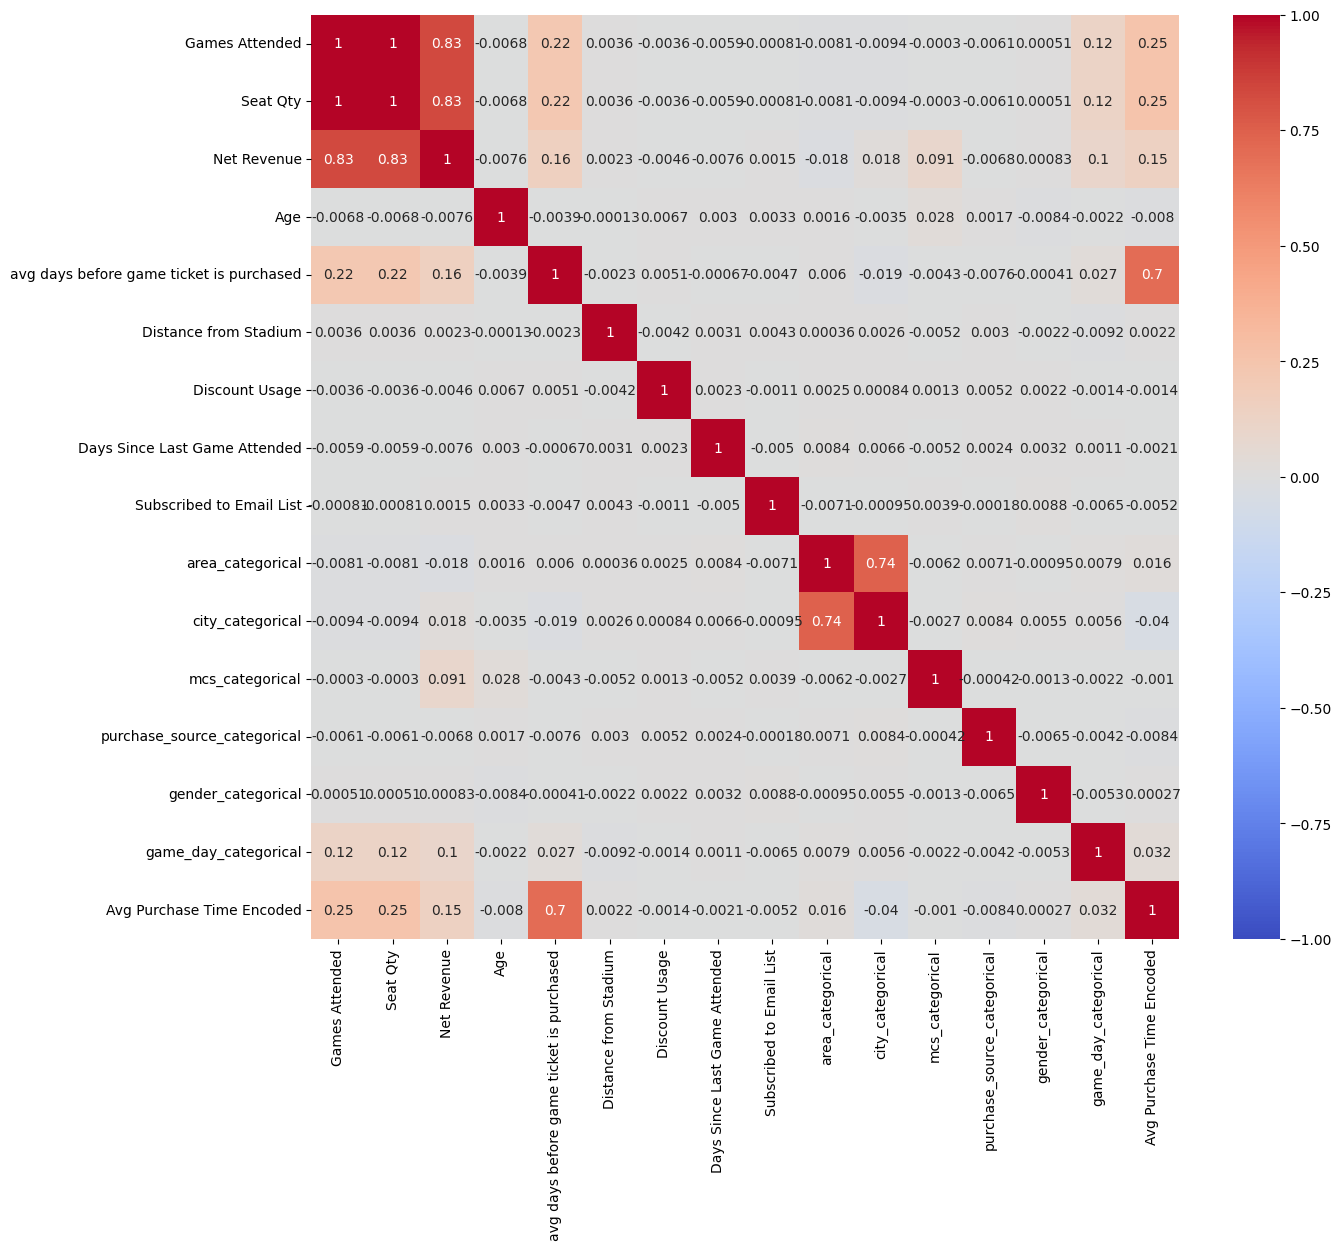

In [123]:
corr_matrix = accounts.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

## EDA

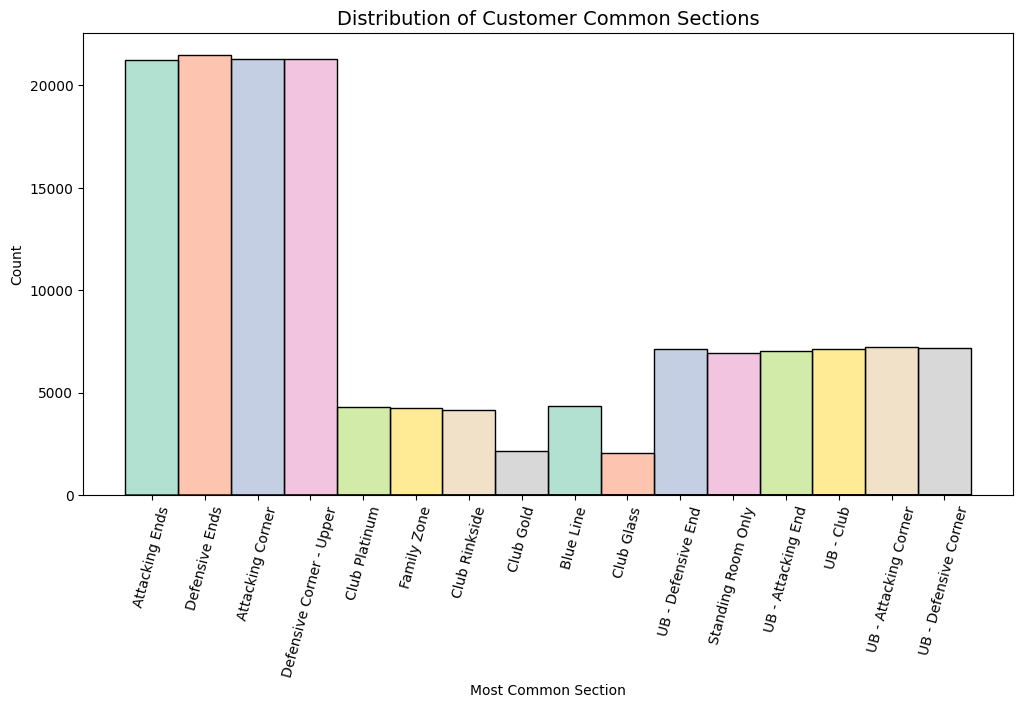

In [124]:
plt.figure(figsize=(12,6))
sns.histplot(x=accounts['Most Common Section'], hue=accounts['Most Common Section'], palette='Set2', legend=False)
plt.xticks(rotation=75)
plt.title('Distribution of Customer Common Sections', fontsize=14)
plt.show()

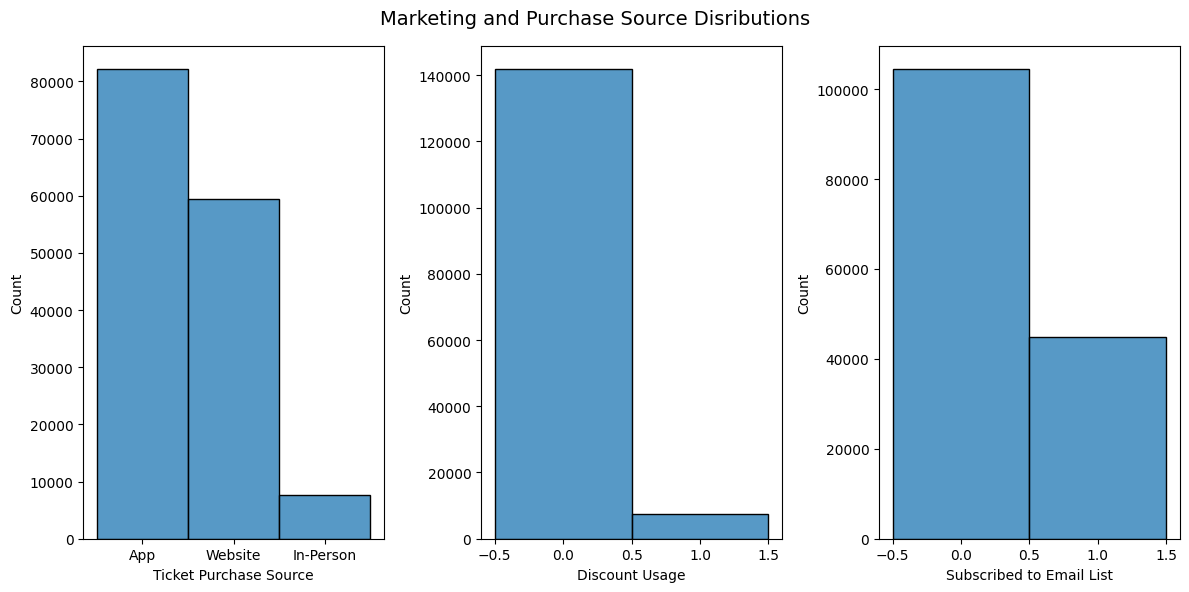

In [125]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.histplot(x=accounts['Ticket Purchase Source'], ax=axes[0])
sns.histplot(x=accounts['Discount Usage'], ax=axes[1], discrete=True)
sns.histplot(x=accounts['Subscribed to Email List'], ax=axes[2], discrete=True)

plt.suptitle('Marketing and Purchase Source Disributions', fontsize=14, ha='center')
plt.tight_layout()
plt.show()

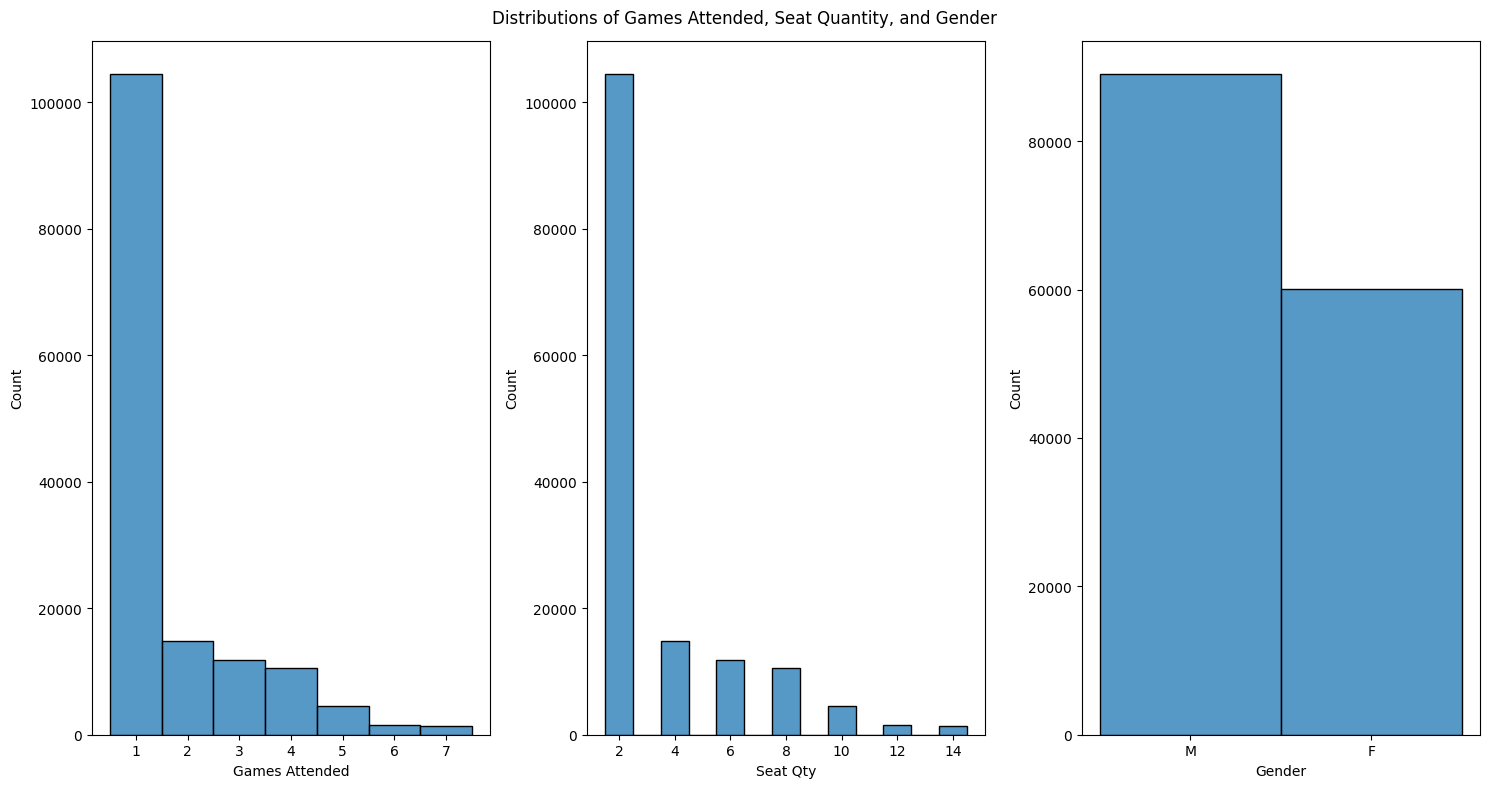

In [126]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

sns.histplot(x=accounts['Games Attended'], discrete=True, ax=axes[0])
sns.histplot(x=accounts['Seat Qty'], discrete=True, ax=axes[1])
sns.histplot(x=accounts['Gender'], ax=axes[2])

plt.suptitle('Distributions of Games Attended, Seat Quantity, and Gender')
plt.tight_layout()
plt.show()

<Axes: ylabel='Games Attended'>

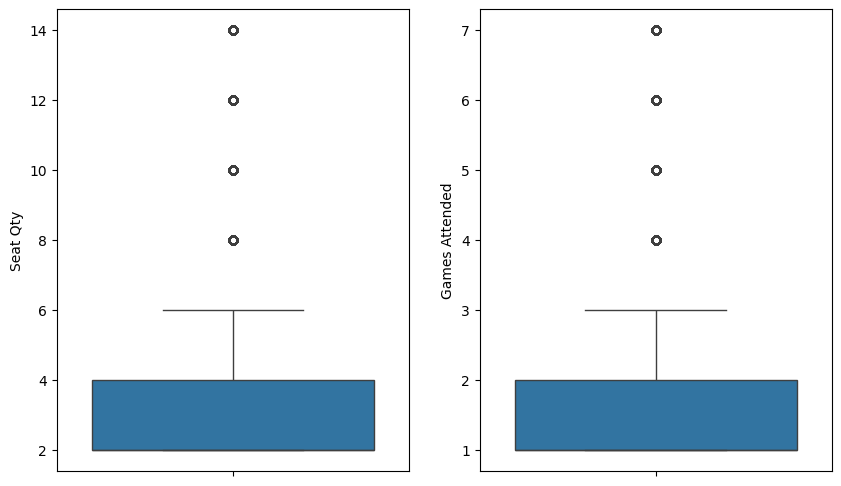

In [127]:
fig, axes = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(y=accounts['Seat Qty'], ax=axes[0])
sns.boxplot(y=accounts['Games Attended'], ax=axes[1])

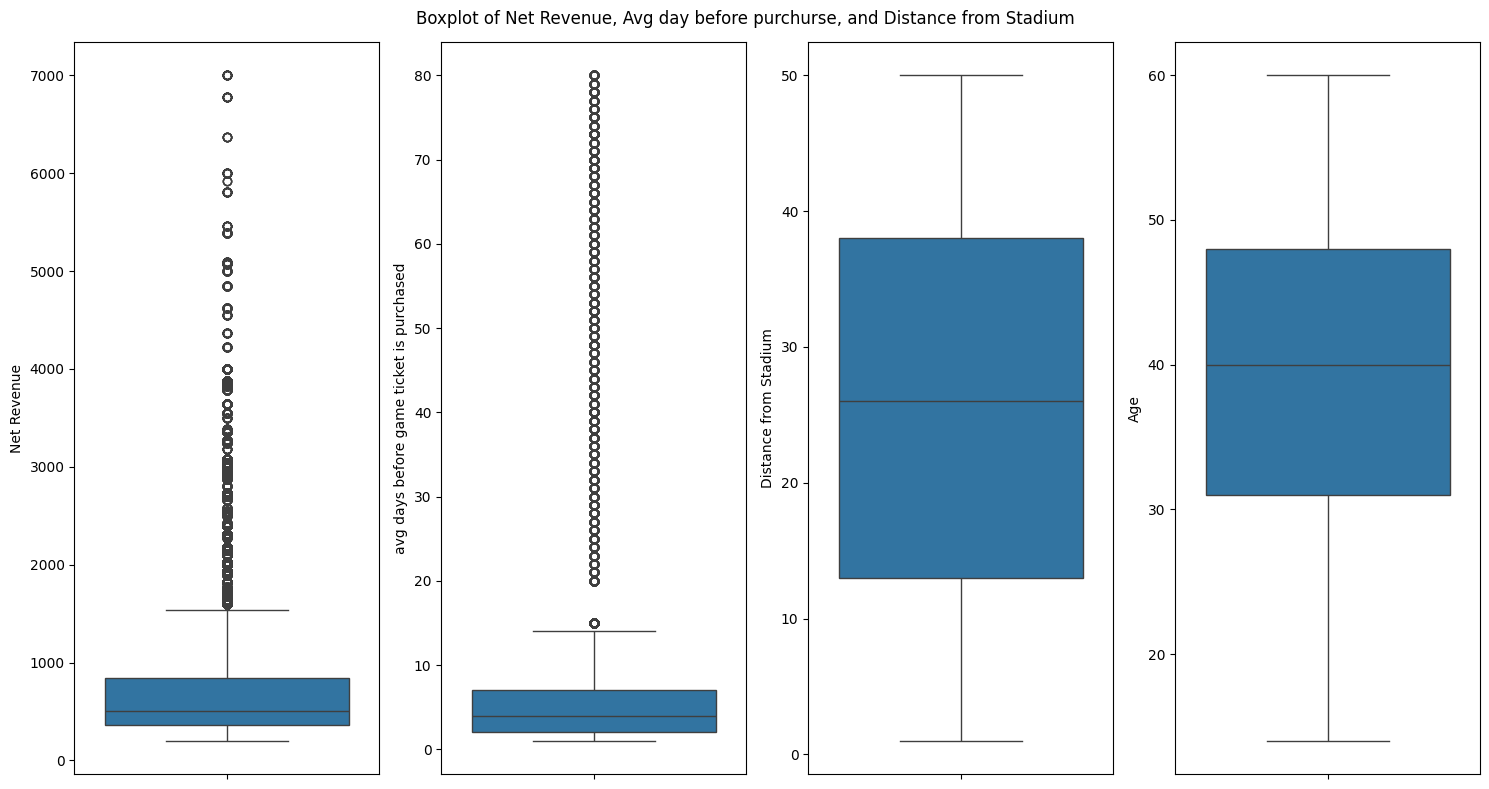

In [128]:
# Can look to winsorize the net revenue column as it has a high volume of outliers

fig, axes = plt.subplots(1, 4, figsize=(15, 8))

sns.boxplot(y=accounts['Net Revenue'], ax=axes[0])
sns.boxplot(y=accounts['avg days before game ticket is purchased'], ax=axes[1])
sns.boxplot(y=accounts['Distance from Stadium'], ax=axes[2])
sns.boxplot(y=accounts['Age'], ax=axes[3])

plt.suptitle('Boxplot of Net Revenue, Avg day before purchurse, and Distance from Stadium', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

In [129]:
total_netrevenue = accounts.groupby('Area')['Net Revenue'].sum()
total_netrevenue =  total_netrevenue.sort_values(ascending=False)

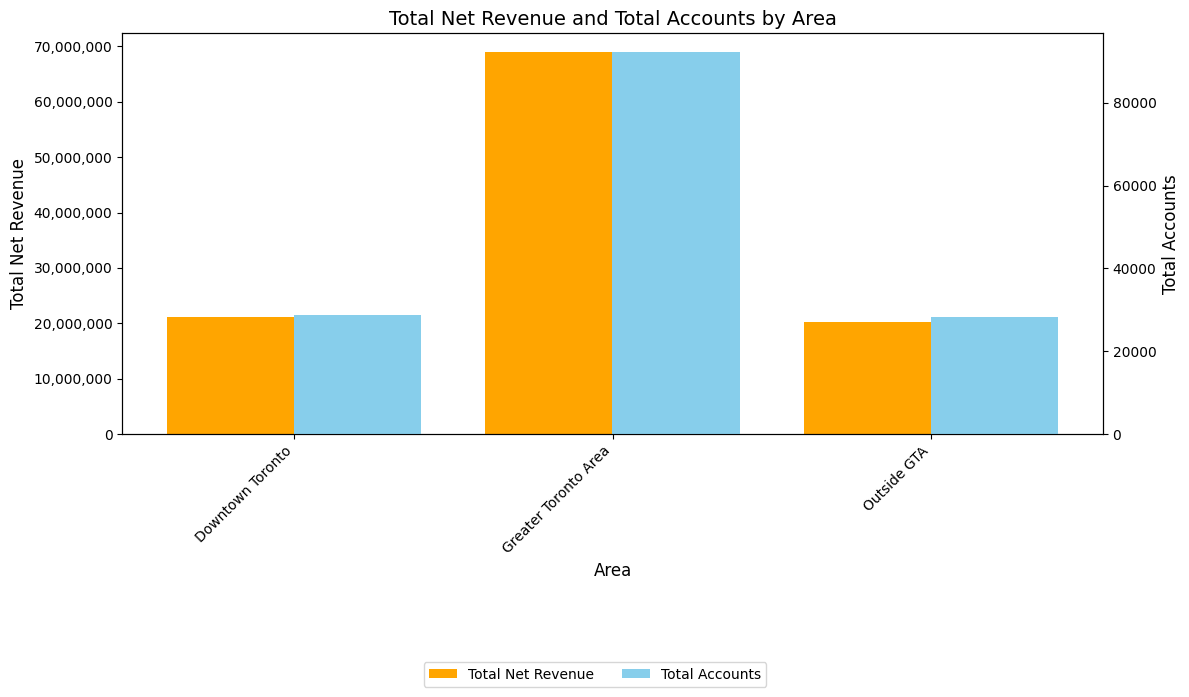

In [130]:
from matplotlib.ticker import FuncFormatter

# Group by Area to calculate totals
area_grouped = accounts.groupby("Area").agg(
    total_net_revenue=("Net Revenue", "sum"),
    total_accounts=("Games Attended", "count")
).reset_index()

# Define variables for plotting
areas = area_grouped["Area"]
total_net_revenue = area_grouped["total_net_revenue"]
total_accounts = area_grouped["total_accounts"]

# Define x positions for the bars
x = np.arange(len(areas))
width = 0.4  # Bar width

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total net revenue on the primary y-axis
bars1 = ax1.bar(x - width/2, total_net_revenue, width, label="Total Net Revenue", color="orange")
ax1.set_ylabel("Total Net Revenue", fontsize=12)
ax1.set_xlabel("Area", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(areas, rotation=45, ha="right")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Create a secondary y-axis for total accounts
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, total_accounts, width, label="Total Accounts", color="skyblue")
ax2.set_ylabel("Total Accounts", fontsize=12)

# Add a title and legend
ax1.set_title("Total Net Revenue and Total Accounts by Area", fontsize=14)
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adjust layout
plt.tight_layout()
plt.show()

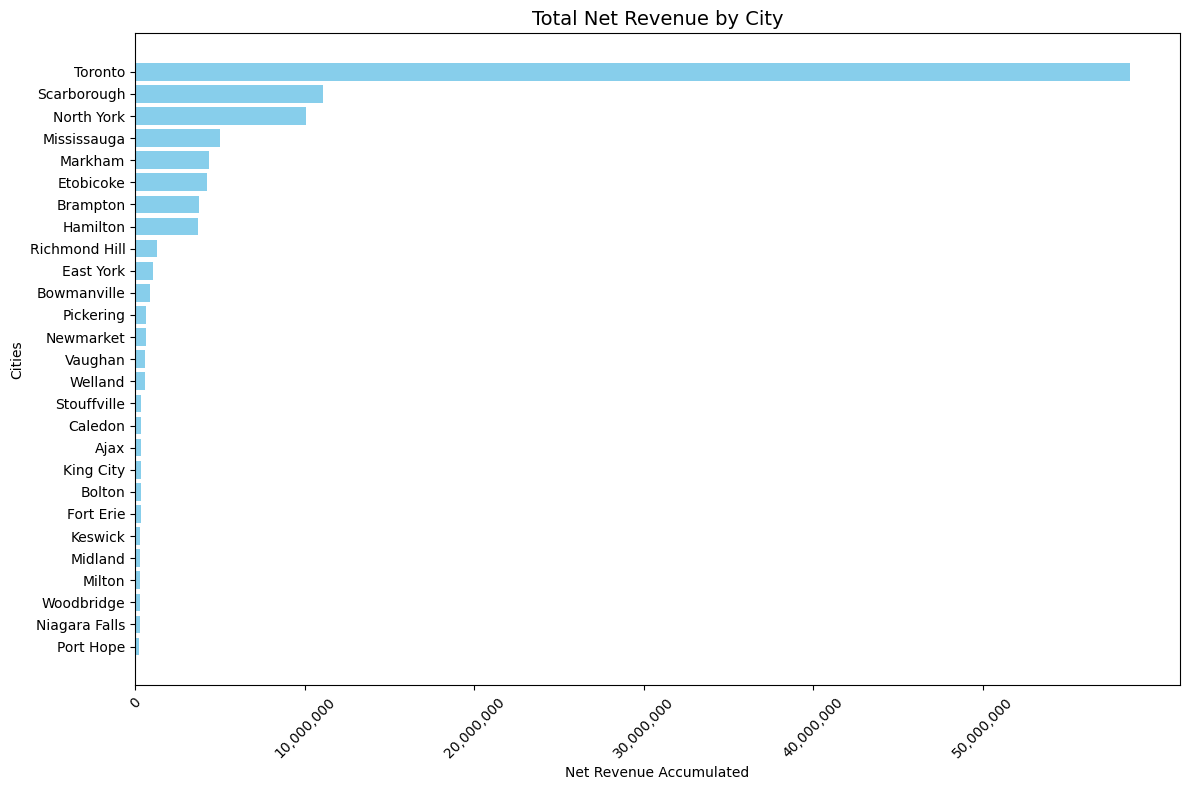

In [131]:
#Looking at total revenue by city

total_netrevenue = accounts.groupby('City')['Net Revenue'].sum()
total_netrevenue =  total_netrevenue.sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.barh(total_netrevenue.index, total_netrevenue.values, color='skyblue')
plt.xlabel('Net Revenue Accumulated')
plt.ylabel('Cities')
plt.title('Total Net Revenue by City', fontsize=14)

x_ticks = np.arange(0, total_netrevenue.values.max() + 1, step=10000000)  # Adjust the step size as needed
plt.xticks(x_ticks, labels=[f"{int(x):,}" for x in x_ticks], fontsize=10, rotation=45)


plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Winsorization of the Variables

In [132]:
accounts['Net Revenue'] = np.clip(accounts['Net Revenue'], None, 4000)
accounts['Seat Qty'] = np.clip(accounts['Seat Qty'], None, 10)
accounts['Games Attended'] = np.clip(accounts['Games Attended'], None, 5)

<Axes: ylabel='Games Attended'>

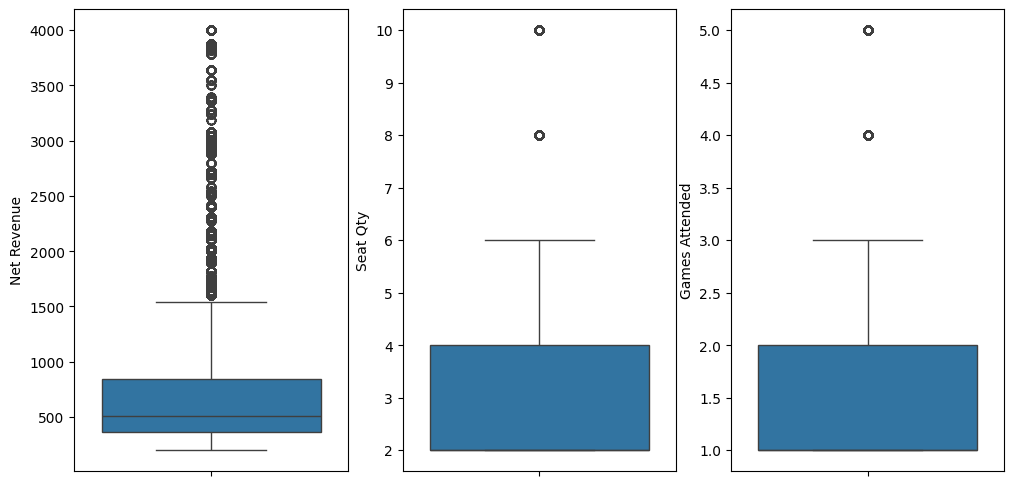

In [133]:
#Visualizations after winsorization

fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.boxplot(y=accounts['Net Revenue'], ax=axes[0])
sns.boxplot(y=accounts['Seat Qty'], ax=axes[1])
sns.boxplot(y=accounts['Games Attended'], ax=axes[2])

### Feature Engineering

In [134]:
# Calculate Average Revenue Per Seat
accounts['Avg Revenue Per Seat'] = accounts['Net Revenue'] / accounts['Seat Qty']

# Calculate Average Revenue Per Game
accounts['Avg Revenue Per Game'] = accounts['Net Revenue'] / accounts['Games Attended']


In [139]:
accounts_final = accounts.drop(['Most Common Section','Region', 'City', 
                                'Area', 'Ticket Purchase Source', 
                                'Most Common Game Day', 'Gender', 'city_categorical',
                                'Distance from Stadium', 'Discount Usage', 'Subscribed to Email List',
                                'Avg Revenue Per Seat', 'avg days before game ticket is purchased',
                                'Avg Purchase Time', 'Net Revenue'], axis=1)

In [140]:
accounts_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149176 entries, 0 to 149175
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Games Attended                 149176 non-null  int64  
 1   Seat Qty                       149176 non-null  int64  
 2   Age                            149176 non-null  int64  
 3   Days Since Last Game Attended  149176 non-null  int64  
 4   area_categorical               149176 non-null  int64  
 5   mcs_categorical                149176 non-null  int64  
 6   purchase_source_categorical    149176 non-null  int64  
 7   gender_categorical             149176 non-null  int64  
 8   game_day_categorical           149176 non-null  int64  
 9   Avg Purchase Time Encoded      149176 non-null  int64  
 10  Avg Revenue Per Game           149176 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 12.5 MB


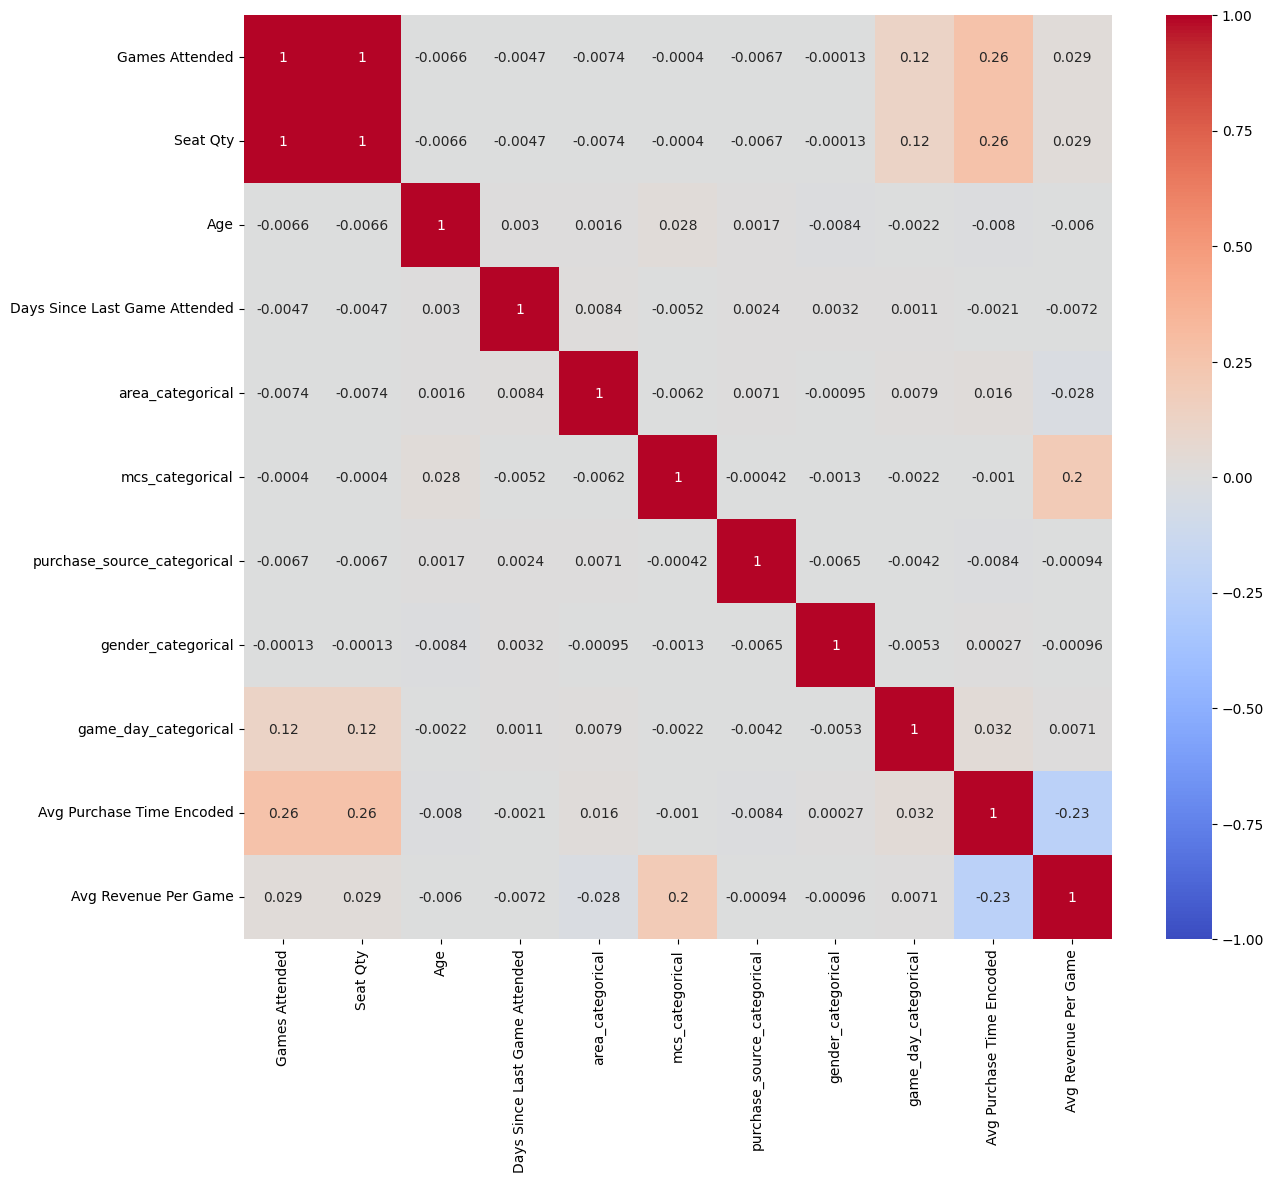

In [141]:
corr_matrix = accounts_final.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [142]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(accounts_final)

minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(accounts_final)

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(accounts_final)

# K Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def elbow_silhouette_analysis(scaled_data, title, sample_size=20000):
    # Take a random sample of 20,000 rows from the dataset using NumPy
    if scaled_data.shape[0] > sample_size:
        random_indices = np.random.choice(scaled_data.shape[0], sample_size, replace=False)
        sample_data = scaled_data[random_indices, :]
    else:
        sample_data = scaled_data 

    # Range of clusters to evaluate
    range_n_clusters = range(2, 11)

    # Lists to store the results
    inertia = []  # For Elbow Method
    silhouette_scores = []  # For Silhouette Analysis

    # Loop over the range of cluster numbers
    for n_clusters in range_n_clusters:
        # Initialize MiniBatchKMeans model
        kmeans = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', random_state=42, batch_size=1024)
        kmeans.fit(sample_data)

        # Elbow method: store inertia
        inertia.append(kmeans.inertia_)

        # Silhouette analysis: calculate silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(sample_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.title(f"Elbow Method – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid(True)

    # Plot Silhouette Analysis
    plt.subplot(1, 2, 2)
    plt.plot(range_n_clusters, silhouette_scores, marker='o')
    plt.title(f"Silhouette Analysis – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)

    # Adjust layout and display plots
    plt.tight_layout()
    plt.show()

# Run the analysis for each scaled dataset
elbow_silhouette_analysis(minmax_df, "MinMax Scaled Data")
elbow_silhouette_analysis(standard_df, "Standard Scaled Data")
elbow_silhouette_analysis(robust_df, "Robust Scaled Data")

In [ ]:
def kmeans_with_pca_visualization_robust(robust_df, n_clusters):
    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, svd_solver='full')
    robust_pca_data = pca.fit_transform(robust_df)
    
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    robust_labels = kmeans.fit_predict(robust_pca_data)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    
    # Create a DataFrame for visualization using the first two principal components
    robust_df_with_clusters = pd.DataFrame(robust_pca_data[:, :2], columns=["PC1", "PC2"])
    robust_df_with_clusters['Cluster'] = robust_labels
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=robust_df_with_clusters, palette="Set2", s=60, alpha=0.7)
    plt.title("KMeans Clustering with PCA (85% Variance) – Robust Scaled Data: Where Elbow Bends")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the silhouette score as a separate output
    print(f"Silhouette Score: {silhouette_avg:.2f}")

kmeans_with_pca_visualization_robust(robust_df, n_clusters=3) 

# HDSBCAN

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import hdbscan

def evaluate_hdbscan(scaled_data, min_cluster_size, min_samples):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    labels = clusterer.fit_predict(scaled_data)
    
    # Count clusters and noise ratio
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_ratio = np.sum(labels == -1) / len(labels)
    
    # Skip configurations with <2 clusters or too much noise
    if n_clusters < 2 or noise_ratio > 0.5:
        return -1, n_clusters
    
    # Calculate silhouette score
    filtered_data = scaled_data[labels != -1]
    filtered_labels = labels[labels != -1]
    try:
        score = silhouette_score(filtered_data, filtered_labels)
    except ValueError:
        score = -1  # Handle cases with one cluster
    
    return score, n_clusters

def optimize_hdbscan_all(minmax_df, standard_df, robust_df, sample_size=10000):
    min_cluster_sizes = range(5, 10) 
    min_samples_values = range(2, 5)  
    
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    best_title, best_hdbscan_data, best_cluster_size, best_min_samples = None, None, None, None
    best_score = -1

    for title, data in datasets.items():
        # Reduce sample size
        if data.shape[0] > sample_size:
            indices = np.random.choice(data.shape[0], sample_size, replace=False)
            sampled_data = data[indices, :]
        else:
            sampled_data = data

        # Evaluate HDBSCAN configurations
        for min_cluster_size in min_cluster_sizes:
            for min_samples in min_samples_values:
                score, n_clusters = evaluate_hdbscan(sampled_data, min_cluster_size, min_samples)
                
                # Update the best configuration
                if score > best_score:
                    best_title = title
                    best_hdbscan_data = sampled_data
                    best_cluster_size = min_cluster_size
                    best_min_samples = min_samples
                    best_score = score
                
                # Early stopping if a high score is found
                if score > 0.8:
                    break
            if best_score > 0.8:
                break
        
        print(f"{title} - Best min_cluster_size: {best_cluster_size}, Best min_samples: {best_min_samples}, "
              f"Silhouette Score: {best_score}")
    
    return best_hdbscan_data, best_cluster_size, best_min_samples, best_score, best_title

# Run the optimization
best_hdbscan_data, best_cluster_size, best_min_samples, best_score, best_title = optimize_hdbscan_all(
    minmax_df, standard_df, robust_df, sample_size=10000
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_title}, Min Cluster Size: {best_cluster_size}, Min Samples: {best_min_samples}, Silhouette Score: {best_score}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hdbscan

def visualize_best_hdbscan_clusters_with_pca(best_hdbscan_data, best_cluster_size, best_min_samples, best_title):
    # Perform HDBSCAN with the best parameters
    clusterer = hdbscan.HDBSCAN(min_cluster_size=best_cluster_size, min_samples=best_min_samples)
    labels = clusterer.fit_predict(best_hdbscan_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_hdbscan_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_hdbscan_data)
    
    # Determine if 2D or 3D visualization is possible
    if pca_data.shape[1] >= 3:
        pca_3d_data = pca_data[:, :3]
        pca_2d_data = pca_data[:, :2]
    else:
        pca_2d_data = pca_data
        pca_3d_data = None  # Not enough dimensions for 3D

    # 2D Plot
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label % len(unique_labels))
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_2d_data[labels == label, 0],
            pca_2d_data[labels == label, 1],
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"HDBSCAN Clustering on {best_title} (min_cluster_size={best_cluster_size}, min_samples={best_min_samples}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot (if available)
    if pca_3d_data is not None:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        for label in unique_labels:
            if label == -1:
                color = "black"
                label_text = "Noise"
            else:
                color = colors(label % len(unique_labels))
                label_text = f"Cluster {label + 1}"
            
            ax.scatter(
                pca_3d_data[labels == label, 0],
                pca_3d_data[labels == label, 1],
                pca_3d_data[labels == label, 2],
                s=50, c=[color], label=label_text, alpha=0.7
            )
        
        ax.set_title(f"HDBSCAN Clustering on {best_title} (min_cluster_size={best_cluster_size}, min_samples={best_min_samples}) - 3D PCA (85% Variance Retained)")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Return the metrics and labels
    return silhouette_avg, n_clusters, n_noise, labels

def characterize_clusters(data, labels):
    # Convert to DataFrame if necessary
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
    
    # Add the labels as a new column
    data['Cluster'] = labels
    
    # Group by cluster and calculate mean for each feature
    cluster_characteristics = data.groupby('Cluster').mean()
    
    # Count the number of points in each cluster
    cluster_sizes = data['Cluster'].value_counts().sort_index()
    
    # Add the size of each cluster as a new column
    cluster_characteristics['Cluster Size'] = cluster_sizes

    # Reset index for better readability
    cluster_characteristics.reset_index(inplace=True)
    return cluster_characteristics

# Call the visualization function using the best parameters from the optimization
silhouette_avg, num_clusters, num_noise_points, labels = visualize_best_hdbscan_clusters_with_pca(
    best_hdbscan_data, best_cluster_size, best_min_samples, best_title
)

# Display metrics
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

# Characterize clusters
cluster_characteristics = characterize_clusters(best_hdbscan_data, labels)
print(cluster_characteristics)

# DBSCAN

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def optimize_dbscan_all(minmax_df, standard_df, robust_df, sample_size=10000):
    # Define ranges for eps and min_samples
    dbscan_eps_values = np.arange(0.5, 3.0, 0.5)
    dbscan_min_samples_values = range(3, 10)
    
    # Dictionary to hold the datasets and titles
    dbscan_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_dbscan_title = None
    best_dbscan_eps = None
    best_dbscan_min_samples = None
    best_dbscan_score = -1
    best_dbscan_data = None  # Renamed variable
    
    # Iterate over each dataset
    for dbscan_title, dbscan_scaled_data in dbscan_datasets.items():
        # Sample the data if it's larger than the specified sample size
        if dbscan_scaled_data.shape[0] > sample_size:
            indices = np.random.choice(dbscan_scaled_data.shape[0], sample_size, replace=False)
            sampled_data = dbscan_scaled_data[indices, :]
        else:
            sampled_data = dbscan_scaled_data

        # Local variables to find the best for each dataset
        best_dbscan_eps_for_dataset = None
        best_dbscan_min_samples_for_dataset = None
        best_dbscan_score_for_dataset = -1

        # Iterate over combinations of eps and min_samples
        for dbscan_eps in dbscan_eps_values:
            early_stop = False  # Early stopping flag for this dataset
            for dbscan_min_samples in dbscan_min_samples_values:
                # Apply DBSCAN
                dbscan_model = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
                dbscan_labels = dbscan_model.fit_predict(sampled_data)
                
                # Count the number of clusters (excluding noise)
                dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
                noise_ratio = np.sum(dbscan_labels == -1) / len(dbscan_labels)
                
                # Skip configurations with fewer than two clusters or excessive noise
                if dbscan_n_clusters < 2 or noise_ratio > 0.5:
                    continue
                
                # Filter out noise points for silhouette score calculation
                filtered_data = sampled_data[dbscan_labels != -1]
                filtered_labels = dbscan_labels[dbscan_labels != -1]

                try:
                    dbscan_score = silhouette_score(filtered_data, filtered_labels)
                except ValueError:
                    # Skip configurations where silhouette score calculation fails
                    continue

                # Update the best score for the current dataset
                if dbscan_score > best_dbscan_score_for_dataset:
                    best_dbscan_eps_for_dataset = dbscan_eps
                    best_dbscan_min_samples_for_dataset = dbscan_min_samples
                    best_dbscan_score_for_dataset = dbscan_score

                # Stop early if a high silhouette score is found
                if dbscan_score > 0.8:
                    early_stop = True
                    break

            if early_stop:
                break

        # Print the best configuration for this dataset
        print(f"{dbscan_title} - Best eps: {best_dbscan_eps_for_dataset}, Best min_samples: {best_dbscan_min_samples_for_dataset}, "
              f"Silhouette Score: {best_dbscan_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_dbscan_score_for_dataset > best_dbscan_score:
            best_dbscan_title = dbscan_title
            best_dbscan_eps = best_dbscan_eps_for_dataset
            best_dbscan_min_samples = best_dbscan_min_samples_for_dataset
            best_dbscan_score = best_dbscan_score_for_dataset
            best_dbscan_data = sampled_data  # Updated to best_dbscan_data

    # Return the best configuration across all datasets
    return best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_score, best_dbscan_title

# Use the function to process all three datasets at once
best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_score, best_dbscan_title = optimize_dbscan_all(
    minmax_df, standard_df, robust_df, sample_size=10000
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_dbscan_title}, Eps: {best_dbscan_eps}, Min Samples: {best_dbscan_min_samples}, Silhouette Score: {best_dbscan_score}")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import plotly.graph_objs as go

def visualize_best_dbscan_clusters_optimized_pca(best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_title):
    # Perform DBSCAN with the best parameters
    dbscan = DBSCAN(eps=best_dbscan_eps, min_samples=best_dbscan_min_samples)
    labels = dbscan.fit_predict(best_dbscan_data)
    
    # Filter out noise points for silhouette score calculation
    filtered_data = best_dbscan_data[labels != -1]
    filtered_labels = labels[labels != -1]

    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(filtered_data, filtered_labels)
    else:
        silhouette_avg = "Not applicable"

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_dbscan_data)
    
    # Split PCA into 2D and 3D data for visualization
    pca_2d_data = pca_data[:, :2]
    pca_3d_data = pca_data[:, :3] if pca_data.shape[1] >= 3 else None

    # Plot 2D visualization
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Define distinct colors for clusters
    distinct_colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFC300', '#FF33A1', '#33FFF0', '#A1FF33']
    for label in unique_labels:
        if label == -1:
            # Black color for noise points
            color = "black"
            label_text = "Noise"
        else:
            color = distinct_colors[label % len(distinct_colors)]
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_2d_data[labels == label, 0], 
            pca_2d_data[labels == label, 1], 
            s=50, c=color, label=label_text, alpha=0.7
        )
    
    # Title with dataset name and best parameters
    plt.title(f"DBSCAN Clustering on {best_dbscan_title} (eps={best_dbscan_eps}, min_samples={best_dbscan_min_samples}) - PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot with Plotly (if available)
    if pca_3d_data is not None:
        fig = go.Figure()

        for label in unique_labels:
            if label == -1:
                color = "black"
                label_text = "Noise"
            else:
                color = distinct_colors[label % len(distinct_colors)]
                label_text = f"Cluster {label + 1}"
            
            fig.add_trace(go.Scatter3d(
                x=pca_3d_data[labels == label, 0],
                y=pca_3d_data[labels == label, 1],
                z=pca_3d_data[labels == label, 2],
                mode='markers',
                marker=dict(size=8, color=color, opacity=0.8),
                name=label_text
            ))

        fig.update_layout(
            scene=dict(
                xaxis_title="PCA Component 1",
                yaxis_title="PCA Component 2",
                zaxis_title="PCA Component 3"
            ),
            title=f"3D PCA Visualization - {best_dbscan_title}",
            height=800
        )
        fig.show()

    # Return the metrics
    return silhouette_avg, n_clusters, n_noise

# Call the function using the best configuration from optimization
silhouette_avg, num_clusters, num_noise_points = visualize_best_dbscan_clusters_optimized_pca(
    best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_title
)

# Display metrics
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

# BIRCH Model

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_birch_all(minmax_df, standard_df, robust_df, branching_factors=[25, 50], thresholds=[0.5, 1.0], sample_size=20000, early_stop=0.8):
    # Dictionary to hold the datasets and titles
    birch_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_birch_title = None
    best_birch_branching_factor = None
    best_birch_threshold = None
    best_birch_score = -1
    best_birch_data = None  # Store the data corresponding to the best configuration
    
    # Iterate over each dataset
    for title, data in birch_datasets.items():
        # Sample data if it's too large
        if data.shape[0] > sample_size:
            random_indices = np.random.choice(data.shape[0], sample_size, replace=False)
            sampled_data = data[random_indices, :]
        else:
            sampled_data = data

        # Local variables to find the best for each dataset
        best_branching_for_dataset = None
        best_threshold_for_dataset = None
        best_score_for_dataset = -1

        # Iterate over combinations of branching factor and threshold
        for branching_factor in branching_factors:
            for threshold in thresholds:
                try:
                    # Fit the BIRCH model
                    birch = Birch(branching_factor=branching_factor, threshold=threshold)
                    labels = birch.fit_predict(sampled_data)

                    # Check if there are enough clusters
                    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                    if n_clusters < 3:
                        continue  # Skip configurations with fewer than 2 clusters

                    # Calculate the silhouette score
                    score = silhouette_score(sampled_data, labels)
                    
                    # Update the best score for this dataset
                    if score > best_score_for_dataset:
                        best_branching_for_dataset = branching_factor
                        best_threshold_for_dataset = threshold
                        best_score_for_dataset = score
                    
                    # Early stopping if a high silhouette score is found
                    if score >= early_stop:
                        print(f"Early stopping: {title} reached silhouette score {score} with branching_factor={branching_factor}, threshold={threshold}")
                        best_branching_for_dataset = branching_factor
                        best_threshold_for_dataset = threshold
                        best_score_for_dataset = score
                        break  # Exit threshold loop

                except Exception as e:
                    print(f"Error for dataset {title} with branching_factor={branching_factor}, threshold={threshold}: {e}")
                    continue

            if best_score_for_dataset >= early_stop:
                break  # Exit branching factor loop

        # Print the best configuration for this dataset
        print(f"{title} - Best Branching Factor: {best_branching_for_dataset}, Best Threshold: {best_threshold_for_dataset}, "
              f"Silhouette Score: {best_score_for_dataset}")

        # Update the best overall configuration
        if best_score_for_dataset > best_birch_score:
            best_birch_title = title
            best_birch_branching_factor = best_branching_for_dataset
            best_birch_threshold = best_threshold_for_dataset
            best_birch_score = best_score_for_dataset
            best_birch_data = sampled_data

    # Return the best configuration across all datasets
    return best_birch_data, best_birch_branching_factor, best_birch_threshold, best_birch_score, best_birch_title

# Example usage
best_birch_data, best_birch_branching_factor, best_birch_threshold, best_birch_score, best_birch_title = optimize_birch_all(
    minmax_df, standard_df, robust_df, branching_factors=[25, 50], thresholds=[0.5, 1.0], sample_size=20000, early_stop=0.8
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_birch_title}, Branching Factor: {best_birch_branching_factor}, Threshold: {best_birch_threshold}, Silhouette Score: {best_birch_score}")

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import Birch

def visualize_birch_clusters(best_birch_data, best_birch_branching_factor, best_birch_threshold, best_birch_title, sample_size=2000):
    # Debugging: Check the input data
    print(f"Input Data Shape: {best_birch_data.shape}")
    print(f"Branching Factor: {best_birch_branching_factor}, Threshold: {best_birch_threshold}")

    # Subsample data for visualization if it's too large
    if best_birch_data.shape[0] > sample_size:
        random_indices = np.random.choice(best_birch_data.shape[0], sample_size, replace=False)
        visualization_data = best_birch_data[random_indices, :]
    else:
        visualization_data = best_birch_data

    # Debugging: Check the visualization data shape
    print(f"Visualization Data Shape: {visualization_data.shape}")

    # Perform BIRCH clustering
    birch = Birch(branching_factor=best_birch_branching_factor, threshold=best_birch_threshold)
    labels = birch.fit_predict(visualization_data)

    # Debugging: Check labels
    print(f"Labels: {set(labels)}")

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(visualization_data)

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Generate distinct colors for clusters
    distinct_colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFC300', '#FF33A1', '#33FFF0', '#A1FF33', '#5733FF', '#FF5733']
    for label in unique_labels:
        if label == -1:  # Noise points
            color = "black"
            label_text = "Noise"
        else:
            color = distinct_colors[label % len(distinct_colors)]
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=color, label=label_text, alpha=0.7
        )
    
    # Title and labels
    plt.title(f"BIRCH Clustering on {best_birch_title} (Branching Factor={best_birch_branching_factor}, Threshold={best_birch_threshold}) - PCA (2D)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()

    # Debugging: Confirm plotting
    print("Plotting...")
    plt.show()

# Usage example (replace with your actual parameters):
try:
    visualize_birch_clusters(
        best_birch_data, 
        best_birch_branching_factor, 
        best_birch_threshold, 
        best_birch_title, 
        sample_size=2000
    )
except Exception as e:
    print(f"Error during visualization: {e}")

# Expectation Maximization (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_em_all(minmax_df, standard_df, robust_df, sample_size=20000):
    # Reduced ranges for initial testing
    n_components_values = range(2, 5)
    covariance_types = ['full', 'diag'] 

    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_em_title = None
    best_em_n_components = None
    best_em_covariance_type = None
    best_em_score = -1
    best_em_data = None
    
    # Iterate over each dataset
    for title, data in datasets.items():
        # Sample the data if larger than sample_size
        if data.shape[0] > sample_size:
            random_indices = np.random.choice(data.shape[0], sample_size, replace=False)
            scaled_data = data[random_indices, :]
        else:
            scaled_data = data
        
        # Local variables to find the best for each dataset
        best_em_n_components_for_dataset = None
        best_em_covariance_type_for_dataset = None
        best_em_score_for_dataset = -1

        # Iterate over combinations of n_components and covariance_type
        for n_components in n_components_values:
            early_termination = False
            
            for covariance_type in covariance_types:
                gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
                
                # Fit the model and get labels
                labels = gmm.fit_predict(scaled_data)
                
                # Count the number of unique clusters
                n_clusters = len(set(labels))
                
                # Skip configurations with fewer than two clusters
                if n_clusters < 2:
                    early_termination = True
                    break  # Skip further covariance types for this n_components
                
                # Calculate silhouette score for valid configurations
                try:
                    score = silhouette_score(scaled_data, labels)
                except ValueError:
                    score = -1  # Handle cases where silhouette score calculation fails
                
                # Update the best score for the current dataset
                if score > best_em_score_for_dataset:
                    best_em_n_components_for_dataset = n_components
                    best_em_covariance_type_for_dataset = covariance_type
                    best_em_score_for_dataset = score

                # Early stop if a high silhouette score is found
                if score > 0.9:
                    early_termination = True
                    break
            
            if early_termination:
                break  # Exit loop for this `n_components` if a good configuration is found

        # Print the best configuration for this dataset
        print(f"{title} - Best n_components: {best_em_n_components_for_dataset}, "
              f"Covariance Type: {best_em_covariance_type_for_dataset}, Silhouette Score: {best_em_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_em_score_for_dataset > best_em_score:
            best_em_title = title
            best_em_n_components = best_em_n_components_for_dataset
            best_em_covariance_type = best_em_covariance_type_for_dataset
            best_em_score = best_em_score_for_dataset
            best_em_data = scaled_data

    # Return the best configuration across all datasets
    return best_em_data, best_em_n_components, best_em_covariance_type, best_em_score, best_em_title

# Use the function to process all three datasets at once
best_em_data, best_em_n_components, best_em_covariance_type, best_em_score, best_em_title = optimize_em_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_em_title}, N Components: {best_em_n_components}, Covariance Type: {best_em_covariance_type}, Silhouette Score: {best_em_score}")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def visualize_best_em_clusters_optimized_pca(best_em_data, best_em_n_components, best_em_covariance_type, best_em_title):
    # Perform GMM with the best parameters
    gmm = GaussianMixture(n_components=best_em_n_components, covariance_type=best_em_covariance_type, random_state=42)
    labels = gmm.fit_predict(best_em_data)
    
    # Calculate additional metrics
    n_em_clusters = len(set(labels))
    n_em_noise = list(labels).count(-1)  # For GMM, there usually isn’t noise, but including this for consistency
    if n_em_clusters > 1:
        silhouette_em_avg = silhouette_score(best_em_data, labels)
    else:
        silhouette_em_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_em_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if pca_data.shape[1] > 2:
        pca_data = pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use a color map without brown tones
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"GMM Clustering on {best_em_title} (n_components={best_em_n_components}, covariance_type={best_em_covariance_type}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return silhouette_em_avg, n_em_clusters, n_em_noise

# Call the function using the best configuration from optimize_em_all
silhouette_em_avg, num_em_clusters, num_em_noise_points = visualize_best_em_clusters_optimized_pca(
    best_em_data, best_em_n_components, best_em_covariance_type, best_em_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_em_avg}")
print(f"Number of Clusters: {num_em_clusters}")
print(f"Number of Noise Points: {num_em_noise_points}")

# Agglomerative Clustering

In [80]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_agglomerative_all(minmax_df, standard_df, robust_df, clustering_sample_size=1000):
    # Define ranges for number of clusters and linkage types
    n_clusters_values = range(3, 10)
    linkage_methods = ['ward', 'complete']
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_agglomerative_title = None
    best_agglomerative_n_clusters = None
    best_agglomerative_linkage = None
    best_agglomerative_score = -1
    best_agglomerative_data = None
    
    # Iterate over each dataset
    for title, data in datasets.items():
        # Sample the data for clustering evaluation
        if data.shape[0] > clustering_sample_size:
            random_indices = np.random.choice(data.shape[0], clustering_sample_size, replace=False)
            scaled_data = data[random_indices, :]
        else:
            scaled_data = data

        # Local variables to find the best for each dataset
        best_n_clusters_for_dataset = None
        best_linkage_for_dataset = None
        best_score_for_dataset = -1

        # Iterate over combinations of n_clusters and linkage
        for n_clusters in n_clusters_values:
            for linkage_method in linkage_methods:
                agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
                labels = agglomerative.fit_predict(scaled_data)
                
                # Only consider configurations that produce more than 1 valid cluster
                n_clusters_found = len(set(labels))
                if n_clusters_found > 1:
                    score = silhouette_score(scaled_data, labels)
                    if score > best_score_for_dataset:
                        best_n_clusters_for_dataset = n_clusters
                        best_linkage_for_dataset = linkage_method
                        best_score_for_dataset = score
        
        # Print the best configuration for this dataset
        print(f"{title} - Best n_clusters: {best_n_clusters_for_dataset}, "
              f"Linkage: {best_linkage_for_dataset}, Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_agglomerative_score:
            best_agglomerative_title = title
            best_agglomerative_n_clusters = best_n_clusters_for_dataset
            best_agglomerative_linkage = best_linkage_for_dataset
            best_agglomerative_score = best_score_for_dataset
            best_agglomerative_data = data 
    
    # Return the best configuration across all datasets
    return best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_score, best_agglomerative_title

# Use the function to process all three datasets at once
best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_score, best_agglomerative_title = optimize_agglomerative_all(minmax_df, standard_df, robust_df, clustering_sample_size=1000)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_agglomerative_title}, N Clusters: {best_agglomerative_n_clusters}, Linkage: {best_agglomerative_linkage}, Silhouette Score: {best_agglomerative_score}")

MinMax Data - Best n_clusters: 4, Linkage: ward, Silhouette Score: 0.2234605618778849
Standard Data - Best n_clusters: 3, Linkage: complete, Silhouette Score: 0.27460838199565
Robust Data - Best n_clusters: 3, Linkage: complete, Silhouette Score: 0.4877996760877676

Best configuration across all datasets:
Dataset: Robust Data, N Clusters: 3, Linkage: complete, Silhouette Score: 0.4877996760877676


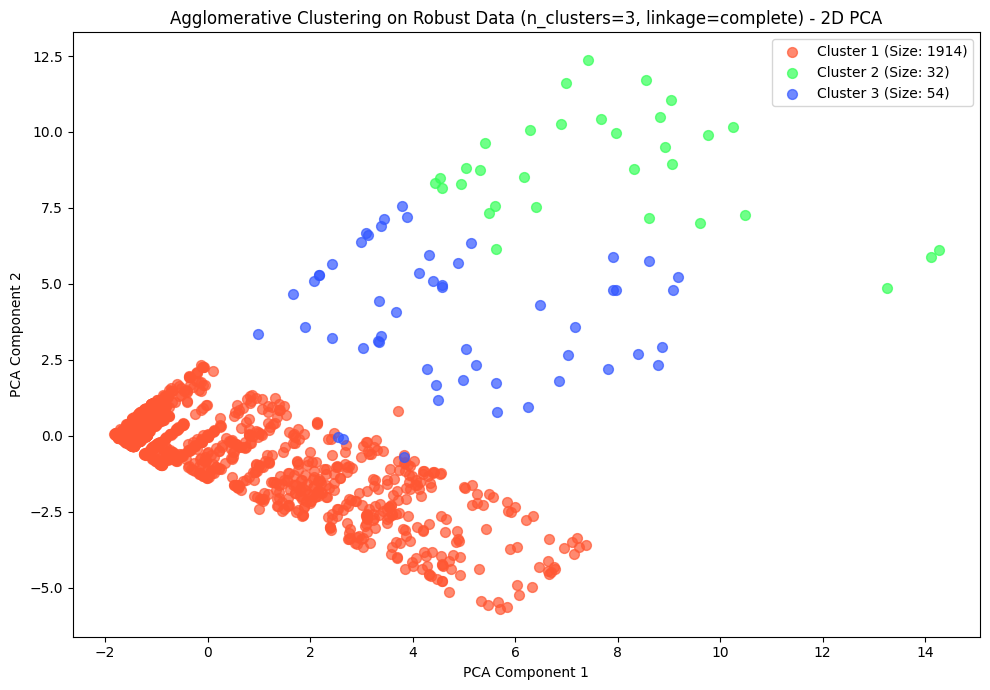

Silhouette Score: 0.4997091811810251
Number of Clusters: 3
Number of Noise Points: 0
Cluster Sizes: {0: 1914, 1: 32, 2: 54}


In [81]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np

def visualize_best_agglomerative_clusters_optimized_pca(best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_title, sample_size=2000):
    # Sample data for visualization if it's too large
    if best_agglomerative_data.shape[0] > sample_size:
        random_indices = np.random.choice(best_agglomerative_data.shape[0], sample_size, replace=False)
        visualization_data = best_agglomerative_data[random_indices, :]
    else:
        visualization_data = best_agglomerative_data

    # Perform Agglomerative Clustering with the best parameters
    agglomerative = AgglomerativeClustering(n_clusters=best_agglomerative_n_clusters, linkage=best_agglomerative_linkage)
    labels = agglomerative.fit_predict(visualization_data)
    
    # Calculate additional metrics
    n_clusters_found = len(set(labels))
    cluster_sizes = {label: sum(labels == label) for label in set(labels)}  # Count points in each cluster
    n_noise = list(labels).count(-1)  # Agglomerative Clustering usually doesn’t have noise, but added for consistency
    if n_clusters_found > 1:
        silhouette_avg = silhouette_score(visualization_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA with a fixed number of components for 2D or 3D
    pca_2d = PCA(n_components=2)
    pca_2d_data = pca_2d.fit_transform(visualization_data)
    
    # Define distinct colors for each cluster
    distinct_colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFC300', '#FF33A1', '#33FFF0', '#A1FF33', '#5733FF', '#FF5733']

    # 2D Plot using Matplotlib
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = f"Noise (Size: {cluster_sizes[label]})"
        else:
            color = distinct_colors[label % len(distinct_colors)]
            label_text = f"Cluster {label + 1} (Size: {cluster_sizes[label]})"
        
        plt.scatter(
            pca_2d_data[labels == label, 0], 
            pca_2d_data[labels == label, 1], 
            s=50, c=color, label=label_text, alpha=0.7
        )
    
    plt.title(f"Agglomerative Clustering on {best_agglomerative_title} (n_clusters={best_agglomerative_n_clusters}, linkage={best_agglomerative_linkage}) - 2D PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot with Plotly using a fixed 3 components (only if needed)
    if sample_size <= 5000:  # Limit 3D plotting to smaller samples for performance
        pca_3d = PCA(n_components=3)
        pca_3d_data = pca_3d.fit_transform(visualization_data)
        
        fig = go.Figure()
        for label in unique_labels:
            if label == -1:
                color = "black"
                label_text = f"Noise (Size: {cluster_sizes[label]})"
            else:
                color = distinct_colors[label % len(distinct_colors)]
                label_text = f"Cluster {label + 1} (Size: {cluster_sizes[label]})"
            
            fig.add_trace(go.Scatter3d(
                x=pca_3d_data[labels == label, 0],
                y=pca_3d_data[labels == label, 1],
                z=pca_3d_data[labels == label, 2],
                mode='markers',
                marker=dict(size=8, color=color, opacity=0.8),
                name=label_text
            ))
        
        fig.update_layout(
            scene=dict(
                xaxis_title="PCA Component 1",
                yaxis_title="PCA Component 2",
                zaxis_title="PCA Component 3"
            ),
            title=f"Agglomerative Clustering on {best_agglomerative_title} (n_clusters={best_agglomerative_n_clusters}, linkage={best_agglomerative_linkage}) - 3D PCA",
            height=800
        )
        
        fig.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters_found, n_noise, cluster_sizes

# Call the function directly using the predefined parameters
silhouette_avg, num_clusters, num_noise_points, cluster_sizes = visualize_best_agglomerative_clusters_optimized_pca(
    best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_title, sample_size=2000
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")
print(f"Cluster Sizes: {cluster_sizes}")

# RESULTS